In [2]:
%%script echo skipping...
%conda install -c conda-forge -c pytorch u8darts-all

skipping...


In [69]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing, model_selection, metrics

import darts
from darts.models import RNNModel

from python.acnets.datasets import load_connectivity

In [103]:
ds = xr.load_dataset('data/julia2018_resting/timeseries_dosenbach2010.nc')
X = ds['timeseries'][0].transpose('timestep', 'region')[:,0]

In [214]:
X_ts = darts.TimeSeries.from_values(X.values)
X_train, X_test = X_ts[:80], X_ts[80:]

In [221]:
model = darts.models.RNNModel(input_chunk_length=2)
model.fit(X_train)
pred = model.predict(len(X_test), num_samples=10)

[2022-02-21 03:26:02,400] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 56 samples.
[2022-02-21 03:26:02,400] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 56 samples.
[2022-02-21 03:26:02,405] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-21 03:26:02,405] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  | 26    
--------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.006     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 46.07it/s, loss=0.114]
Predicting: 2it [00:00, ?it/s]


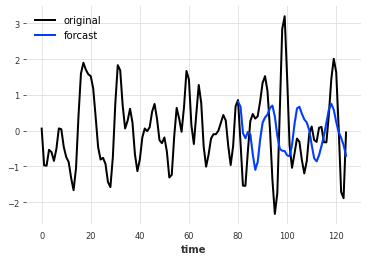

In [222]:


X_ts.plot(label='original')
pred.plot(label='forcast')
plt.legend()
plt.show()

In [193]:
import torch

# rnn
out = model.model.forward(torch.from_numpy(X.values.reshape(-1,1,1)))

'hidden state:', out[1]

('hidden state:',
 tensor([[[ 0.2821, -0.0571,  0.0563,  ..., -0.1735,  0.1284,  0.0952],
          [ 0.1183,  0.2389, -0.1786,  ...,  0.1592,  0.4417, -0.0927],
          [ 0.1171,  0.2409, -0.1803,  ...,  0.1615,  0.4437, -0.0940],
          ...,
          [-0.0041,  0.4300, -0.3372,  ...,  0.3817,  0.6185, -0.2245],
          [-0.0336,  0.4713, -0.3729,  ...,  0.4301,  0.6539, -0.2551],
          [ 0.2652, -0.0252,  0.0312,  ..., -0.1387,  0.1643,  0.0753]]],
        dtype=torch.float64, grad_fn=<StackBackward0>))